# MNIST DATASET MACHINE LEARNING EXAMPLE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('/Users/shreybatra/Downloads/Datasets/MNIST_Dataset/train.csv')

In [3]:
# dataset rows and cols
df.shape

(42000, 785)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
# taking only first 10000 rows
df = df[:10000]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 59.9 MB


In [7]:
df.shape

(10000, 785)

In [8]:
#to see first 10 rows only
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# X is the input features
X = df.drop(['label'], axis=1)

In [10]:
# y is the output labels
y = df['label']

In [11]:
# see first 5 rows of X
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# first 5 values of y
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

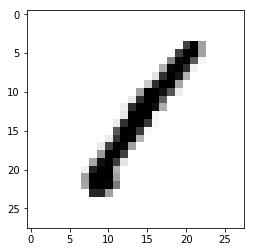

In [13]:
# using matplotlib to plot the first row
plt.imshow(df.values[0][1:].reshape(28,28), cmap='binary')

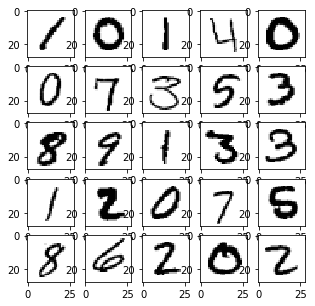

In [14]:
# plotting the first 25 rows
r = 5
c = 5
t = r*c
fig = plt.figure(figsize=(r,c))

for i in range(0,t):
    pic = df.values[i][1:].reshape(28,28)
    fig.add_subplot(r,c,i+1)
    plt.imshow(pic, cmap='binary')
plt.show()

In [15]:
# to split X and y is training and testing sets
from sklearn.model_selection import train_test_split

In [16]:
# to get accuracy and recall measures
from sklearn.metrics import classification_report

In [17]:
# random state defines the jumbling seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Without Pre Processing

### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
#make model object
model_nb = GaussianNB()

In [20]:
# train the model
model_nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [21]:
# predict the labels X_test
model_nb_pred = model_nb.predict(X_test)

In [22]:
# check metrics
print(classification_report(y_test,model_nb_pred))

             precision    recall  f1-score   support

          0       0.84      0.87      0.85       314
          1       0.69      0.95      0.80       367
          2       0.78      0.24      0.37       369
          3       0.64      0.55      0.59       322
          4       0.85      0.39      0.54       319
          5       0.54      0.09      0.15       310
          6       0.59      0.93      0.72       314
          7       0.91      0.30      0.45       360
          8       0.35      0.56      0.43       308
          9       0.39      0.94      0.55       317

avg / total       0.66      0.58      0.55      3300



### Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
# limit the depth for easy computations
model_dt = DecisionTreeClassifier(max_depth=20)

In [25]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
model_dt_pred = model_dt.predict(X_test)

In [27]:
print(classification_report(y_test, model_dt_pred))

             precision    recall  f1-score   support

          0       0.87      0.86      0.87       314
          1       0.88      0.93      0.90       367
          2       0.80      0.72      0.76       369
          3       0.73      0.76      0.74       322
          4       0.78      0.82      0.80       319
          5       0.74      0.70      0.72       310
          6       0.78      0.81      0.80       314
          7       0.82      0.82      0.82       360
          8       0.73      0.68      0.70       308
          9       0.71      0.75      0.73       317

avg / total       0.79      0.79      0.79      3300



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model_lg = LogisticRegression()

In [30]:
model_lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
model_lg_pred = model_lg.predict(X_test)

In [32]:
print(classification_report(y_test, model_lg_pred))

             precision    recall  f1-score   support

          0       0.93      0.89      0.91       314
          1       0.95      0.95      0.95       367
          2       0.88      0.77      0.82       369
          3       0.67      0.75      0.71       322
          4       0.86      0.84      0.85       319
          5       0.72      0.70      0.71       310
          6       0.93      0.89      0.91       314
          7       0.88      0.86      0.87       360
          8       0.63      0.76      0.69       308
          9       0.80      0.78      0.79       317

avg / total       0.83      0.82      0.82      3300



In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model_knn = KNeighborsClassifier()

In [35]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
model_knn_pred = model_knn.predict(X_test)

In [37]:
print(classification_report(y_test, model_knn_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       314
          1       0.89      0.99      0.93       367
          2       0.98      0.90      0.94       369
          3       0.92      0.95      0.93       322
          4       0.96      0.92      0.94       319
          5       0.96      0.94      0.95       310
          6       0.98      0.98      0.98       314
          7       0.94      0.95      0.94       360
          8       0.99      0.87      0.93       308
          9       0.87      0.93      0.90       317

avg / total       0.94      0.94      0.94      3300



In [38]:
from sklearn.neural_network import MLPClassifier

In [45]:
model_nn = MLPClassifier(hidden_layer_sizes=(15,15), max_iter=200, random_state=42)

In [46]:
model_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [47]:
model_nn_pred = model_nn.predict(X_test)

In [48]:
print(classification_report(y_test, model_nn_pred))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86       314
          1       0.86      0.93      0.90       367
          2       0.72      0.74      0.73       369
          3       0.57      0.46      0.51       322
          4       0.21      0.05      0.08       319
          5       0.67      0.53      0.59       310
          6       0.70      0.86      0.77       314
          7       0.27      0.01      0.02       360
          8       0.63      0.37      0.46       308
          9       0.29      0.95      0.44       317

avg / total       0.58      0.58      0.54      3300



### Run all the algorithms again after running the cell at bottom to see change in metrics, starting from train_test_split

In [49]:
X[X>0] = 1